In [36]:
import os


files = os.listdir('../videos')
files = [f for f in files if f.endswith('.csv')]

In [37]:
# Combine all the csv files into one
import pandas as pd
HISTORY = True
if HISTORY:
    df = pd.concat([pd.read_csv('../videos/' + f) for f in files])
    files_history = [f for f in os.listdir('../videos/history') if f.endswith('.csv')]
    df_history = pd.concat([pd.read_csv('../videos/history/' + f) for f in files_history])
    df = pd.concat([df, df_history])
    files_history = [f for f in os.listdir('../videos/history2') if f.endswith('.csv')]
    df_history = pd.concat([pd.read_csv('../videos/history2/' + f) for f in files_history])
    df = pd.concat([df, df_history])
    df = df.drop_duplicates()
else:
    df = pd.concat([pd.read_csv('../videos/' + f) for f in files])
    df = df.drop_duplicates()
df.to_csv('../videos/all_videos.csv', index=False)

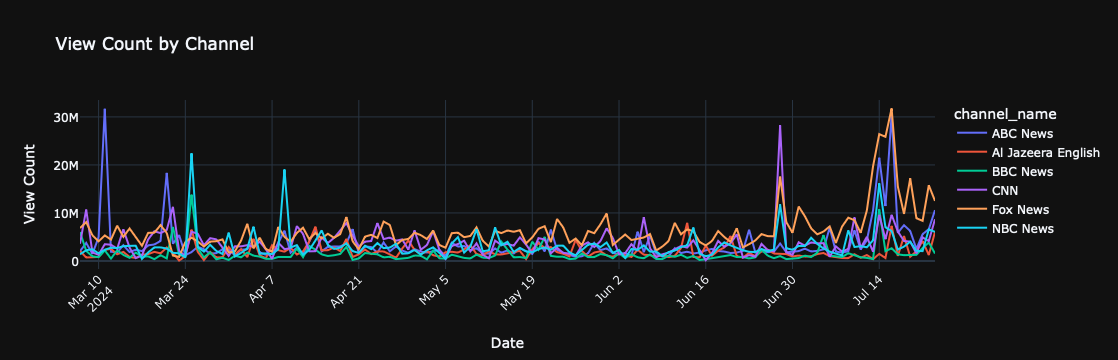

In [38]:
import plotly.express as px
import pandas as pd

# Assuming df is a pandas DataFrame with relevant data
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['published_at']).dt.date
df['view_count'] = df['view_count'].fillna(0).astype(int)
df['like_count'] = df['like_count'].fillna(0).astype(int)
df['comment_count'] = df['comment_count'].fillna(0).astype(int)

# Group data by Date and channel_name
grouped_df = df.groupby(['Date', 'channel_name']).sum().reset_index()

# Plot View Count by Channel
fig_view = px.line(grouped_df, x='Date', y='view_count', color='channel_name', title='View Count by Channel')
fig_view.update_layout(xaxis_title='Date', yaxis_title='View Count', xaxis=dict(tickangle=-45))
fig_view.show()

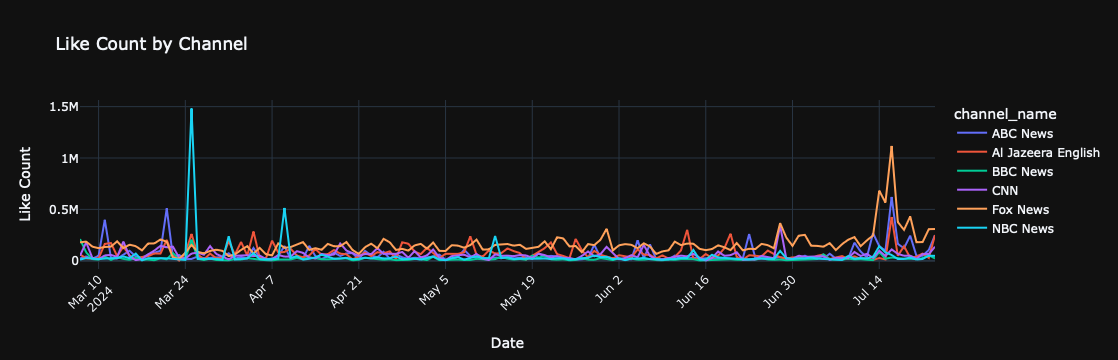

In [39]:
# Plot Like Count by Channel
fig_like = px.line(grouped_df, x='Date', y='like_count', color='channel_name', title='Like Count by Channel')
fig_like.update_layout(xaxis_title='Date', yaxis_title='Like Count', xaxis=dict(tickangle=-45))
fig_like.show()

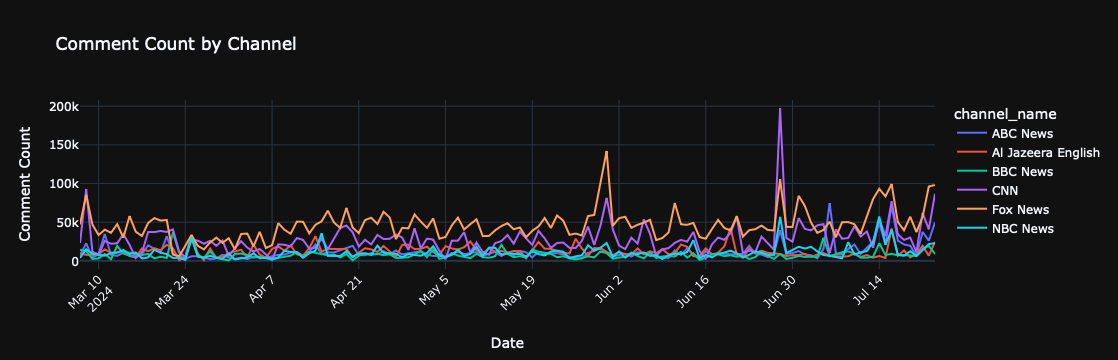

In [40]:
# Plot Comment Count by Channel
fig_comment = px.line(grouped_df, x='Date', y='comment_count', color='channel_name', title='Comment Count by Channel')
fig_comment.update_layout(xaxis_title='Date', yaxis_title='Comment Count', xaxis=dict(tickangle=-45))
fig_comment.show()

In [41]:
political_words = ['trump', 'biden', 'democrat', 'republican']
political_df = df[df['video_title'].str.contains('|'.join(political_words), case=False)]

In [42]:
import plotly.express as px
import pandas as pd

# Assuming df and political_df are pandas DataFrames with relevant data
# Ensure the 'Date' column is in datetime format and make a copy to avoid SettingWithCopyWarning
political_df = political_df.copy()
political_df['Date'] = pd.to_datetime(political_df['published_at']).dt.date

df = df.copy()
df['Date'] = pd.to_datetime(df['published_at']).dt.date

# Plot Video Count by Channel for Political Videos
fig_video_count = px.line(political_df.groupby(['Date', 'channel_name'])['video_id'].count().reset_index(), 
                          x='Date', y='video_id', color='channel_name',
                          title='Video Count by Channel for Political Videos')
fig_video_count.update_layout(xaxis_title='Date', yaxis_title='Video Count', xaxis=dict(tickangle=-45))
fig_video_count.show()


In [43]:
# Plot Percentage of Political Videos by Channel
total_videos = df.groupby(['Date', 'channel_name'])['video_id'].count().reset_index()
political_videos = political_df.groupby(['Date', 'channel_name'])['video_id'].count().reset_index()
percentage_videos = political_videos.merge(total_videos, on=['Date', 'channel_name'], suffixes=('_political', '_total'))
percentage_videos['percentage'] = percentage_videos['video_id_political'] / percentage_videos['video_id_total']

fig_percentage_videos = px.line(percentage_videos, x='Date', y='percentage', color='channel_name',
                                title='Percentage of Political Videos by Channel')
fig_percentage_videos.update_layout(xaxis_title='Date', yaxis_title='Percentage', xaxis=dict(tickangle=-45))
fig_percentage_videos.show()


In [44]:
# Plot View Count by Channel for Political Videos
fig_view_count = px.line(political_df.groupby(['Date', 'channel_name'])['view_count'].sum().reset_index(), 
                         x='Date', y='view_count', color='channel_name',
                         title='View Count by Channel for Political Videos')
fig_view_count.update_layout(xaxis_title='Date', yaxis_title='View Count', xaxis=dict(tickangle=-45))
fig_view_count.show()


In [45]:
# Plot Like Count by Channel for Political Videos
fig_like_count = px.line(political_df.groupby(['Date', 'channel_name'])['like_count'].sum().reset_index(), 
                         x='Date', y='like_count', color='channel_name',
                         title='Like Count by Channel for Political Videos')
fig_like_count.update_layout(xaxis_title='Date', yaxis_title='Like Count', xaxis=dict(tickangle=-45))
fig_like_count.show()


In [46]:
# Plot Comment Count by Channel for Political Videos
fig_comment_count = px.line(political_df.groupby(['Date', 'channel_name'])['comment_count'].sum().reset_index(), 
                            x='Date', y='comment_count', color='channel_name',
                            title='Comment Count by Channel for Political Videos')
fig_comment_count.update_layout(xaxis_title='Date', yaxis_title='Comment Count', xaxis=dict(tickangle=-45))
fig_comment_count.show()

In [47]:
# CNN and Fox News
cnn_fox = df[df['channel_name'].isin(['CNN', 'Fox News'])]
cnn_fox

,channel_name,video_title,published_at,video_id,view_count,like_count,comment_count,Date
25,Fox News,‘The Five’: Kamala receives ‘brutal’ feedback ...,2024-04-23T23:30:09Z,ftU67hCYlvc,601874,10857,2533,2024-04-23
26,Fox News,Tyrus: We have a terrorist group marching in N...,2024-04-23T22:45:00Z,KisbbLuB-WQ,409073,18953,5424,2024-04-23
27,Fox News,‘The Five’: Trump clashes with prosecutors ove...,2024-04-23T22:00:14Z,QHh9B2VXO60,232233,6089,2479,2024-04-23
28,Fox News,Biden ripped over cannibal claim: &#39;A plagi...,2024-04-23T21:15:00Z,a82pVg2ndP4,81678,2633,1259,2024-04-23
29,Fox News,Trump: The gag order is &#39;totally unconstit...,2024-04-23T20:26:41Z,Rl14by2FRGw,57359,1395,1878,2024-04-23
...,...,...,...,...,...,...,...,...
20276,CNN,Haberman: ‘Very confusing’ Trump team seemed ‘...,2024-07-23T02:41:11Z,i3X8U1HlfKU,1186635,14259,6909,2024-07-23
20277,CNN,Sen. Bernie Sanders shares what it will take t...,2024-07-23T02:00:11Z,RVtX9ri5V7I,352427,4983,2604,2024-07-23
20278,CNN,‘He ain’t one of us’: Beshear slams Vance’s Ap...,2024-07-23T01:30:24Z,_vTFhV_nuR8,203009,3222,1906,2024-07-23
20279,CNN,Hear Biden&#39;s message for Harris and her ca...,2024-07-23T01:24:47Z,Q3Ym7Mn5pY0,66278,2470,699,2024-07-23


In [48]:
import numpy as np
import plotly.graph_objs as go

# Assuming cnn_fox and df are already defined as pandas DataFrame objects

# Group data and calculate view counts per channel per date
data = cnn_fox.groupby(['Date', 'channel_name'])['view_count'].sum().unstack().fillna(0)

# Calculate the 98th percentile for the view counts across all data
quantile = data.values.flatten()
quantile = quantile[quantile > 0]  # Remove zeros if necessary
percentile = np.percentile(quantile, 98)

# Create an interactive plot for view counts
fig = go.Figure()

for channel in data.columns:
    fig.add_trace(go.Scatter(x=data.index, y=data[channel], mode='lines', name=channel))

fig.add_hline(y=percentile, line=dict(color='red', dash='dash'), annotation_text=f'98th Percentile ({percentile:.2f})', annotation_position='top left')
fig.update_layout(
    title='View Count by Channel for CNN and Fox News',
    xaxis_title='Date',
    yaxis_title='View Count',
    hovermode='x unified',
    xaxis=dict(type='category', tickangle=-45),  # Rotate x-axis labels
    template='plotly_white',
    width=800,  # Set the width of the plot
    height=500  # Set the height of the plot
)
fig.show()


In [49]:
# Print the dates exceeding the 98th percentile
print("Dates exceeding the 98th percentile for CNN")
print(data[data['CNN'] > percentile])
print("Dates exceeding the 98th percentile for Fox News")
print(data[data['Fox News'] > percentile])

Dates exceeding the 98th percentile for CNN
channel_name       CNN  Fox News
Date                            
2024-06-28    28226595  17562402
Dates exceeding the 98th percentile for Fox News
channel_name       CNN  Fox News
Date                            
2024-06-28    28226595  17562402
2024-07-13     1927858  19701172
2024-07-14     9601638  26416683
2024-07-15     4526728  25853440
2024-07-16     9611323  31762457


In [50]:
# Interactive plot for like counts
like_data = cnn_fox.groupby(['Date', 'channel_name'])['like_count'].sum().unstack().fillna(0)
fig_likes = go.Figure()

for channel in like_data.columns:
    fig_likes.add_trace(go.Scatter(x=like_data.index, y=like_data[channel], mode='lines', name=channel))

fig_likes.update_layout(
    title='Like Count by Channel for CNN and Fox News',
    xaxis_title='Date',
    yaxis_title='Like Count',
    hovermode='x unified',
    xaxis=dict(type='category', tickangle=-45),  # Rotate x-axis labels
    template='plotly_white',
    width=800,
    height=500
)
fig_likes.show()

In [51]:
# Interactive plot for comment counts
comment_data = cnn_fox.groupby(['Date', 'channel_name'])['comment_count'].sum().unstack().fillna(0)
fig_comments = go.Figure()

for channel in comment_data.columns:
    fig_comments.add_trace(go.Scatter(x=comment_data.index, y=comment_data[channel], mode='lines', name=channel))

fig_comments.update_layout(
    title='Comment Count by Channel for CNN and Fox News',
    xaxis_title='Date',
    yaxis_title='Comment Count',
    hovermode='x unified',
    xaxis=dict(type='category', tickangle=-45),  # Rotate x-axis labels
    template='plotly_white',
    width=800,
    height=500
)
fig_comments.show()

In [52]:
import plotly.express as px
import pandas as pd

# Assuming cnn_fox is a pandas DataFrame with relevant data
# Ensure the 'Date' column is in datetime format
cnn_fox = cnn_fox.copy(deep=True)  # Ensure we're working with a copy
cnn_fox['Date'] = pd.to_datetime(cnn_fox['Date'])

# Calculate the descriptive statistics and find the 99th percentile for view counts
view_count_stats = cnn_fox['view_count'].describe()
view_count_99th = cnn_fox['view_count'].quantile(0.99)

# Filter the dataset to find videos with view counts in the top 1% and ensure we're working with a copy
outliers = cnn_fox.loc[cnn_fox['view_count'] > view_count_99th].copy(deep=True)

# Print summary statistics and details about the outliers
print(f"View count statistics:\n{view_count_stats}")
print(f"\n99th percentile view count: {view_count_99th}")
print(f"\nVideos with view counts above the 99th percentile:")
print(outliers[['Date', 'channel_name', 'video_title', 'view_count']])

View count statistics:
count    6.331000e+03
mean     2.234510e+05
std      3.822186e+05
min      2.311000e+03
25%      5.446500e+04
50%      1.161380e+05
75%      2.649305e+05
max      1.210359e+07
Name: view_count, dtype: float64

99th percentile view count: 1527749.4999999928

Videos with view counts above the 99th percentile:
            Date channel_name  \
67    2024-04-20          CNN   
48    2024-04-21          CNN   
72    2024-04-19     Fox News   
85    2024-04-24          CNN   
79    2024-04-30          CNN   
...          ...          ...   
19634 2024-07-19     Fox News   
19940 2024-07-20     Fox News   
20065 2024-07-22     Fox News   
20075 2024-07-22     Fox News   
20263 2024-07-23          CNN   

                                             video_title  view_count  
67     Reporter describes moment judge told Trump to ...     1862289  
48     Hear Michael Douglas&#39; response when asked ...     2209627  
72     Israel begins retaliatory strikes on Iran: Report  

In [53]:
# Sort the data by date to ensure chronological order
outliers = outliers.sort_values(by='Date')

# Create an interactive plot to show these outliers
fig = px.scatter(outliers, 
                 x='Date', 
                 y='view_count', 
                 color='channel_name', 
                 size='view_count', 
                 hover_data=['video_title', 'view_count'],
                 title='Top 1% Most Viewed Videos on CNN and Fox News',
                 labels={'view_count': 'View Count', 'channel_name': 'Channel'})

# Update layout for better readability and chronological ordering
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='View Count',
    xaxis=dict(tickangle=-45),  # Rotate x-axis labels
    template='plotly_white',
    width=1000,  # Adjust the width of the plot
    height=600   # Adjust the height of the plot
)

# Show the plot
fig.show()

In [54]:
# Ensure cnn_fox is a copy of the original DataFrame to avoid SettingWithCopyWarning
cnn_fox = cnn_fox.copy()

# Initialize appearance column with default value
cnn_fox['appearance'] = -1

# Use vectorized string operations to update the 'appearance' column
cnn_fox['video_title_lower'] = cnn_fox['video_title'].str.lower()
cnn_fox.loc[cnn_fox['video_title_lower'].str.contains('trump') & ~cnn_fox['video_title_lower'].str.contains('biden'), 'appearance'] = 0
cnn_fox.loc[cnn_fox['video_title_lower'].str.contains('biden') & ~cnn_fox['video_title_lower'].str.contains('trump'), 'appearance'] = 1
cnn_fox.loc[cnn_fox['video_title_lower'].str.contains('biden') & cnn_fox['video_title_lower'].str.contains('trump'), 'appearance'] = 2

# Drop the temporary 'video_title_lower' column
cnn_fox = cnn_fox.drop(columns=['video_title_lower'])

In [55]:
cnn_fox_political = cnn_fox[cnn_fox['appearance'] != -1]
cnn_fox_political.describe()
var = cnn_fox_political[cnn_fox_political['view_count'] > cnn_fox_political['view_count'].quantile(0.98)]

In [56]:
import plotly.express as px
import pandas as pd

# Ensure cnn_fox_political is a copy to avoid SettingWithCopyWarning
cnn_fox_political = cnn_fox_political.copy()

# Ensure the 'Date' column is in datetime format
cnn_fox_political['Date'] = pd.to_datetime(cnn_fox_political['Date'])

# Filter the dataset to find videos with view counts in the top 2%
top_videos = cnn_fox_political[cnn_fox_political['view_count'] > cnn_fox_political['view_count'].quantile(0.98)].copy()

# Print summary statistics and details about the top 2% most viewed videos
print(f"Videos with view counts above the 98th percentile:")
print(top_videos[['Date', 'channel_name', 'video_title', 'view_count']])

# Create an interactive plot to show these top-viewed videos
fig = px.scatter(top_videos, 
                 x='Date', 
                 y='view_count', 
                 color='channel_name', 
                 size='view_count', 
                 hover_data=['video_title', 'view_count'],
                 title='Top 2% Most Viewed Videos about Trump or Biden on CNN and Fox News',
                 labels={'view_count': 'View Count', 'channel_name': 'Channel'},
                 template='plotly_white')

# Update layout for better readability
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='View Count',
    xaxis=dict(tickangle=-45),  # Rotate x-axis labels
    width=1000,  # Set the width of the plot
    height=600   # Set the height of the plot
)

# Show the plot
fig.show()

Videos with view counts above the 98th percentile:
            Date channel_name  \
67    2024-04-20          CNN   
48    2024-04-21          CNN   
71    2024-04-25     Fox News   
79    2024-04-30          CNN   
2068  2024-04-17          CNN   
...          ...          ...   
19596 2024-07-19     Fox News   
19622 2024-07-19     Fox News   
19634 2024-07-19     Fox News   
19940 2024-07-20     Fox News   
20263 2024-07-23          CNN   

                                             video_title  view_count  
67     Reporter describes moment judge told Trump to ...     1862289  
48     Hear Michael Douglas&#39; response when asked ...     2209627  
71         Jesse Watters: Biden ran away from the podium     1348565  
79     Professor who correctly predicted 9 presidenti...     1872430  
2068   How Melania reacted when she learned about Tru...     1717818  
...                                                  ...         ...  
19596  Trump shooter had 3 overseas encrypted account..

In [57]:
import plotly.graph_objs as go
import pandas as pd

# Assuming cnn_fox is a pandas DataFrame with relevant data
# Ensure the 'Date' column is in datetime format
cnn_fox['Date'] = pd.to_datetime(cnn_fox['Date'])

# Define date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Plot for CNN
# y_1 for only trump
y_1_cnn = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
y_1_cnn = y_1_cnn.reindex(date_range, fill_value=0)
# y_2 for trump and biden / only trump
y_2_cnn = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
y_2_cnn = y_2_cnn.reindex(date_range, fill_value=0)
y_2_cnn = y_2_cnn.add(y_1_cnn, fill_value=0)
# y_3 for trump and biden
y_3_cnn = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
y_3_cnn = y_3_cnn.reindex(date_range, fill_value=0)
y_3_cnn = y_3_cnn.add(y_2_cnn, fill_value=0)

# Create interactive plot for CNN
fig_cnn = go.Figure()
fig_cnn.add_trace(go.Scatter(x=date_range, y=y_1_cnn, mode='lines', fill='tozeroy', name='Trump Only', line=dict(color='red')))
fig_cnn.add_trace(go.Scatter(x=date_range, y=y_2_cnn, mode='lines', fill='tonexty', name='Trump and Biden', line=dict(color='yellow')))
fig_cnn.add_trace(go.Scatter(x=date_range, y=y_3_cnn, mode='lines', fill='tonexty', name='Biden Only', line=dict(color='blue')))

# Update layout for CNN
fig_cnn.update_layout(
    title='CNN: View Counts (Trump and Biden Appearances)',
    xaxis_title='Date',
    yaxis_title='View Count',
    template='plotly_white',
    hovermode='x unified',
    xaxis=dict(tickangle=-45),
    height=600,
    width=1000
)
fig_cnn.show()

In [58]:
# Plot for Fox News
# y_1 for only trump
y_1_fox = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
y_1_fox = y_1_fox.reindex(date_range, fill_value=0)
# y_2 for trump and biden / only trump
y_2_fox = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
y_2_fox = y_2_fox.reindex(date_range, fill_value=0)
y_2_fox = y_2_fox.add(y_1_fox, fill_value=0)
# y_3 for trump and biden
y_3_fox = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
y_3_fox = y_3_fox.reindex(date_range, fill_value=0)
y_3_fox = y_3_fox.add(y_2_fox, fill_value=0)

# Create interactive plot for Fox News
fig_fox = go.Figure()
fig_fox.add_trace(go.Scatter(x=date_range, y=y_1_fox, mode='lines', fill='tozeroy', name='Trump Only', line=dict(color='red', dash='dot')))
fig_fox.add_trace(go.Scatter(x=date_range, y=y_2_fox, mode='lines', fill='tonexty', name='Trump and Biden', line=dict(color='yellow', dash='dot')))
fig_fox.add_trace(go.Scatter(x=date_range, y=y_3_fox, mode='lines', fill='tonexty', name='Biden Only', line=dict(color='blue', dash='dot')))

# Update layout for Fox News
fig_fox.update_layout(
    title='Fox News: View Counts (Trump and Biden Appearances)',
    xaxis_title='Date',
    yaxis_title='View Count',
    template='plotly_white',
    hovermode='x unified',
    xaxis=dict(tickangle=-45),
    height=600,
    width=1000
)

fig_fox.show()

In [59]:
import pandas as pd

# Assuming cnn_fox is a pandas DataFrame with relevant data
# Ensure the 'Date' column is in datetime format
cnn_fox['Date'] = pd.to_datetime(cnn_fox['Date'])

# Define date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Function to plot data for a channel
def plot_channel_data(channel_name, data, date_range):
    # y_1 for only trump
    y_1 = data[(data['channel_name'] == channel_name) & (data['appearance'] == 0)].fillna(0).groupby('Date')['video_id'].count()
    y_1 = y_1.reindex(date_range, fill_value=0)
    # y_2 for trump and biden / only trump
    y_2 = data[(data['channel_name'] == channel_name) & (data['appearance'] == 2)].fillna(0).groupby('Date')['video_id'].count()
    y_2 = y_2.reindex(date_range, fill_value=0)
    y_2 = y_2.add(y_1, fill_value=0)
    # y_3 for trump and biden
    y_3 = data[(data['channel_name'] == channel_name) & (data['appearance'] == 1)].fillna(0).groupby('Date')['video_id'].count()
    y_3 = y_3.reindex(date_range, fill_value=0)
    y_3 = y_3.add(y_2, fill_value=0)

    # Create the figure
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=date_range, y=y_1, mode='lines', fill='tozeroy', name=f'{channel_name} - Trump Only', line=dict(color='red')))
    fig.add_trace(go.Scatter(x=date_range, y=y_2, mode='lines', fill='tonexty', name=f'{channel_name} - Trump and Biden', line=dict(color='yellow')))
    fig.add_trace(go.Scatter(x=date_range, y=y_3, mode='lines', fill='tonexty', name=f'{channel_name} - Biden Only', line=dict(color='blue')))

    # Update layout
    fig.update_layout(
        title=f'{channel_name}: Video Counts (Trump and Biden Appearances)',
        xaxis_title='Date',
        yaxis_title='Video Count',
        template='plotly_white',
        hovermode='x unified',
        xaxis=dict(tickangle=-45),
        height=600,
        width=1000
    )
    
    return fig

# Plot for CNN
fig_cnn = plot_channel_data('CNN', cnn_fox, date_range)
fig_cnn.show()


In [60]:
import plotly.graph_objs as go
import pandas as pd
import numpy as np
from scipy.signal import find_peaks

# Ensure the 'Date' column is in datetime format
cnn_fox['Date'] = pd.to_datetime(cnn_fox['Date'])

# Define date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Function to calculate moving average and identify peaks
def calculate_moving_average_and_peaks(series, window=7):
    moving_avg = series.rolling(window=window, min_periods=1).mean()
    peaks, _ = find_peaks(series - moving_avg)
    return moving_avg, peaks

# Plot for CNN
# y_1 for only trump
y_1_cnn = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
y_1_cnn = y_1_cnn.reindex(date_range, fill_value=0)
# y_2 for trump and biden / only trump
y_2_cnn = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
y_2_cnn = y_2_cnn.reindex(date_range, fill_value=0)
y_2_cnn = y_2_cnn.add(y_1_cnn, fill_value=0)
# y_3 for trump and biden
y_3_cnn = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
y_3_cnn = y_3_cnn.reindex(date_range, fill_value=0)
y_3_cnn = y_3_cnn.add(y_2_cnn, fill_value=0)

# Calculate moving averages and peaks for CNN
window_size = 7  # Example window size for the moving average
moving_avg_1_cnn, peaks_1_cnn = calculate_moving_average_and_peaks(y_1_cnn, window=window_size)
moving_avg_2_cnn, peaks_2_cnn = calculate_moving_average_and_peaks(y_2_cnn, window=window_size)
moving_avg_3_cnn, peaks_3_cnn = calculate_moving_average_and_peaks(y_3_cnn, window=window_size)

# Plot for Fox News
# y_1 for only trump
y_1_fox = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
y_1_fox = y_1_fox.reindex(date_range, fill_value=0)
# y_2 for trump and biden / only trump
y_2_fox = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
y_2_fox = y_2_fox.reindex(date_range, fill_value=0)
y_2_fox = y_2_fox.add(y_1_fox, fill_value=0)
# y_3 for trump and biden
y_3_fox = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
y_3_fox = y_3_fox.reindex(date_range, fill_value=0)
y_3_fox = y_3_fox.add(y_2_fox, fill_value=0)

# Calculate moving averages and peaks for Fox News
moving_avg_1_fox, peaks_1_fox = calculate_moving_average_and_peaks(y_1_fox, window=window_size)
moving_avg_2_fox, peaks_2_fox = calculate_moving_average_and_peaks(y_2_fox, window=window_size)
moving_avg_3_fox, peaks_3_fox = calculate_moving_average_and_peaks(y_3_fox, window=window_size)

# Create separate interactive plots for each category and channel

# CNN: Trump Only
fig_trump_cnn = go.Figure()
fig_trump_cnn.add_trace(go.Scatter(x=date_range, y=y_1_cnn, mode='lines', fill='tozeroy', name='Trump Only', line=dict(color='red')))
fig_trump_cnn.add_trace(go.Scatter(x=date_range, y=moving_avg_1_cnn, mode='lines', name='Trump Only MA', line=dict(color='darkred', dash='dash')))
fig_trump_cnn.add_trace(go.Scatter(x=date_range[peaks_1_cnn], y=y_1_cnn.iloc[peaks_1_cnn], mode='markers', name='Trump Only Peaks', marker=dict(color='red', size=10, symbol='x')))
fig_trump_cnn.update_layout(
    title='CNN: View Counts for Trump Only with Moving Averages and Peaks',
    xaxis_title='Date',
    yaxis_title='View Count',
    template='plotly_white',
    hovermode='x unified',
    xaxis=dict(tickangle=-45),
    height=600,
    width=1000
)
fig_trump_cnn.show()

# CNN: Trump and Biden
fig_trump_biden_cnn = go.Figure()
fig_trump_biden_cnn.add_trace(go.Scatter(x=date_range, y=y_2_cnn, mode='lines', fill='tozeroy', name='Trump and Biden', line=dict(color='yellow')))
fig_trump_biden_cnn.add_trace(go.Scatter(x=date_range, y=moving_avg_2_cnn, mode='lines', name='Trump and Biden MA', line=dict(color='goldenrod', dash='dash')))
fig_trump_biden_cnn.add_trace(go.Scatter(x=date_range[peaks_2_cnn], y=y_2_cnn.iloc[peaks_2_cnn], mode='markers', name='Trump and Biden Peaks', marker=dict(color='yellow', size=10, symbol='x')))
fig_trump_biden_cnn.update_layout(
    title='CNN: View Counts for Trump and Biden with Moving Averages and Peaks',
    xaxis_title='Date',
    yaxis_title='View Count',
    template='plotly_white',
    hovermode='x unified',
    xaxis=dict(tickangle=-45),
    height=600,
    width=1000
)
fig_trump_biden_cnn.show()

# CNN: Biden Only
fig_biden_cnn = go.Figure()
fig_biden_cnn.add_trace(go.Scatter(x=date_range, y=y_3_cnn, mode='lines', fill='tozeroy', name='Biden Only', line=dict(color='blue')))
fig_biden_cnn.add_trace(go.Scatter(x=date_range, y=moving_avg_3_cnn, mode='lines', name='Biden Only MA', line=dict(color='darkblue', dash='dash')))
fig_biden_cnn.add_trace(go.Scatter(x=date_range[peaks_3_cnn], y=y_3_cnn.iloc[peaks_3_cnn], mode='markers', name='Biden Only Peaks', marker=dict(color='blue', size=10, symbol='x')))
fig_biden_cnn.update_layout(
    title='CNN: View Counts for Biden Only with Moving Averages and Peaks',
    xaxis_title='Date',
    yaxis_title='View Count',
    template='plotly_white',
    hovermode='x unified',
    xaxis=dict(tickangle=-45),
    height=600,
    width=1000
)
fig_biden_cnn.show()

# Fox News: Trump Only
fig_trump_fox = go.Figure()
fig_trump_fox.add_trace(go.Scatter(x=date_range, y=y_1_fox, mode='lines', fill='tozeroy', name='Trump Only', line=dict(color='red')))
fig_trump_fox.add_trace(go.Scatter(x=date_range, y=moving_avg_1_fox, mode='lines', name='Trump Only MA', line=dict(color='darkred', dash='dash')))
fig_trump_fox.add_trace(go.Scatter(x=date_range[peaks_1_fox], y=y_1_fox.iloc[peaks_1_fox], mode='markers', name='Trump Only Peaks', marker=dict(color='red', size=10, symbol='x')))
fig_trump_fox.update_layout(
    title='Fox News: View Counts for Trump Only with Moving Averages and Peaks',
    xaxis_title='Date',
    yaxis_title='View Count',
    template='plotly_white',
    hovermode='x unified',
    xaxis=dict(tickangle=-45),
    height=600,
    width=1000
)
fig_trump_fox.show()

# Fox News: Trump and Biden
fig_trump_biden_fox = go.Figure()
fig_trump_biden_fox.add_trace(go.Scatter(x=date_range, y=y_2_fox, mode='lines', fill='tozeroy', name='Trump and Biden', line=dict(color='yellow')))
fig_trump_biden_fox.add_trace(go.Scatter(x=date_range, y=moving_avg_2_fox, mode='lines', name='Trump and Biden MA', line=dict(color='goldenrod', dash='dash')))
fig_trump_biden_fox.add_trace(go.Scatter(x=date_range[peaks_2_fox], y=y_2_fox.iloc[peaks_2_fox], mode='markers', name='Trump and Biden Peaks', marker=dict(color='yellow', size=10, symbol='x')))
fig_trump_biden_fox.update_layout(
    title='Fox News: View Counts for Trump and Biden with Moving Averages and Peaks',
    xaxis_title='Date',
    yaxis_title='View Count',
    template='plotly_white',
    hovermode='x unified',
    xaxis=dict(tickangle=-45),
    height=600,
    width=1000
)
fig_trump_biden_fox.show()

# Fox News: Biden Only
fig_biden_fox = go.Figure()
fig_biden_fox.add_trace(go.Scatter(x=date_range, y=y_3_fox, mode='lines', fill='tozeroy', name='Biden Only', line=dict(color='blue')))
fig_biden_fox.add_trace(go.Scatter(x=date_range, y=moving_avg_3_fox, mode='lines', name='Biden Only MA', line=dict(color='darkblue', dash='dash')))
fig_biden_fox.add_trace(go.Scatter(x=date_range[peaks_3_fox], y=y_3_fox.iloc[peaks_3_fox], mode='markers', name='Biden Only Peaks', marker=dict(color='blue', size=10, symbol='x')))
fig_biden_fox.update_layout(
    title='Fox News: View Counts for Biden Only with Moving Averages and Peaks',
    xaxis_title='Date',
    yaxis_title='View Count',
    template='plotly_white',
    hovermode='x unified',
    xaxis=dict(tickangle=-45),
    height=600,
    width=1000
)
fig_biden_fox.show()


In [61]:
import plotly.graph_objs as go
import pandas as pd

# Assuming cnn_fox is a pandas DataFrame with relevant data
# Ensure the 'Date' column is in datetime format
cnn_fox['Date'] = pd.to_datetime(cnn_fox['Date'])

# Define date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Function to plot data for a channel
def plot_like_data(channel_name, data, date_range):
    # y_1 for only Trump
    y_1 = data[(data['channel_name'] == channel_name) & (data['appearance'] == 0)].fillna(0).groupby('Date')['like_count'].sum()
    y_1 = y_1.reindex(date_range, fill_value=0)
    # y_2 for Trump and Biden / only Trump
    y_2 = data[(data['channel_name'] == channel_name) & (data['appearance'] == 2)].fillna(0).groupby('Date')['like_count'].sum()
    y_2 = y_2.reindex(date_range, fill_value=0)
    y_2 = y_2.add(y_1, fill_value=0)
    # y_3 for Trump and Biden
    y_3 = data[(data['channel_name'] == channel_name) & (data['appearance'] == 1)].fillna(0).groupby('Date')['like_count'].sum()
    y_3 = y_3.reindex(date_range, fill_value=0)
    y_3 = y_3.add(y_2, fill_value=0)

    # Create the figure
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=date_range, y=y_1, mode='lines', fill='tozeroy', name=f'{channel_name} - Trump Only', line=dict(color='red')))
    fig.add_trace(go.Scatter(x=date_range, y=y_2, mode='lines', fill='tonexty', name=f'{channel_name} - Trump and Biden', line=dict(color='yellow')))
    fig.add_trace(go.Scatter(x=date_range, y=y_3, mode='lines', fill='tonexty', name=f'{channel_name} - Biden Only', line=dict(color='blue')))

    # Update layout
    fig.update_layout(
        title=f'{channel_name}: Like Counts (Trump and Biden Appearances)',
        xaxis_title='Date',
        yaxis_title='Like Count',
        template='plotly_white',
        hovermode='x unified',
        xaxis=dict(tickangle=-45),
        height=600,
        width=1000
    )
    
    return fig

# Plot for CNN
fig_cnn = plot_like_data('CNN', cnn_fox, date_range)
fig_cnn.show()

In [62]:
# Plot for Fox News
fig_fox = plot_like_data('Fox News', cnn_fox, date_range)
fig_fox.show()

In [63]:
import pandas as pd

# Assuming cnn_fox is a pandas DataFrame with relevant data
# Ensure the 'Date' column is in datetime format
cnn_fox['Date'] = pd.to_datetime(cnn_fox['Date'])

# Define date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Function to plot like per view data for a channel
def plot_like_per_view_data(channel_name, data, date_range):
    # y_1 for only Trump
    y_1_likes = data[(data['channel_name'] == channel_name) & (data['appearance'] == 0)].fillna(0).groupby('Date')['like_count'].sum()
    y_1_views = data[(data['channel_name'] == channel_name) & (data['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
    y_1 = (y_1_likes / y_1_views).reindex(date_range, fill_value=0)
    
    # y_2 for Trump and Biden / only Trump
    y_2_likes = data[(data['channel_name'] == channel_name) & (data['appearance'] == 2)].fillna(0).groupby('Date')['like_count'].sum()
    y_2_views = data[(data['channel_name'] == channel_name) & (data['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
    y_2 = (y_2_likes / y_2_views).reindex(date_range, fill_value=0)
    y_2 = y_2.add(y_1, fill_value=0)
    
    # y_3 for Trump and Biden
    y_3_likes = data[(data['channel_name'] == channel_name) & (data['appearance'] == 1)].fillna(0).groupby('Date')['like_count'].sum()
    y_3_views = data[(data['channel_name'] == channel_name) & (data['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
    y_3 = (y_3_likes / y_3_views).reindex(date_range, fill_value=0)
    y_3 = y_3.add(y_2, fill_value=0)

    # Create the figure
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=date_range, y=y_1, mode='lines', fill='tozeroy', name=f'{channel_name} - Trump Only', line=dict(color='red')))
    fig.add_trace(go.Scatter(x=date_range, y=y_2, mode='lines', fill='tonexty', name=f'{channel_name} - Trump and Biden', line=dict(color='yellow')))
    fig.add_trace(go.Scatter(x=date_range, y=y_3, mode='lines', fill='tonexty', name=f'{channel_name} - Biden Only', line=dict(color='blue')))

    # Update layout
    fig.update_layout(
        title=f'{channel_name}: Like per View (Trump and Biden Appearances)',
        xaxis_title='Date',
        yaxis_title='Like per View',
        template='plotly_white',
        hovermode='x unified',
        xaxis=dict(tickangle=-45),
        height=600,
        width=1000
    )
    
    return fig

# Plot for CNN
fig_cnn = plot_like_per_view_data('CNN', cnn_fox, date_range)
fig_cnn.show()

In [64]:
# Plot for Fox News
fig_fox = plot_like_per_view_data('Fox News', cnn_fox, date_range)
fig_fox.show()

In [65]:
import pandas as pd

# Assuming cnn_fox is a pandas DataFrame with relevant data
# Ensure the 'Date' column is in datetime format
cnn_fox['Date'] = pd.to_datetime(cnn_fox['Date'])

# Define date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Function to plot comment count data for a channel
def plot_comment_data(channel_name, data, date_range):
    # y_1 for only Trump
    y_1 = data[(data['channel_name'] == channel_name) & (data['appearance'] == 0)].fillna(0).groupby('Date')['comment_count'].sum()
    y_1 = y_1.reindex(date_range, fill_value=0)
    
    # y_2 for Trump and Biden / only Trump
    y_2 = data[(data['channel_name'] == channel_name) & (data['appearance'] == 2)].fillna(0).groupby('Date')['comment_count'].sum()
    y_2 = y_2.reindex(date_range, fill_value=0)
    y_2 = y_2.add(y_1, fill_value=0)
    
    # y_3 for Trump and Biden
    y_3 = data[(data['channel_name'] == channel_name) & (data['appearance'] == 1)].fillna(0).groupby('Date')['comment_count'].sum()
    y_3 = y_3.reindex(date_range, fill_value=0)
    y_3 = y_3.add(y_2, fill_value=0)

    # Create the figure
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=date_range, y=y_1, mode='lines', fill='tozeroy', name=f'{channel_name} - Trump Only', line=dict(color='red')))
    fig.add_trace(go.Scatter(x=date_range, y=y_2, mode='lines', fill='tonexty', name=f'{channel_name} - Trump and Biden', line=dict(color='yellow')))
    fig.add_trace(go.Scatter(x=date_range, y=y_3, mode='lines', fill='tonexty', name=f'{channel_name} - Biden Only', line=dict(color='blue')))

    # Update layout
    fig.update_layout(
        title=f'{channel_name}: Comment Counts (Trump and Biden Appearances)',
        xaxis_title='Date',
        yaxis_title='Comment Count',
        template='plotly_white',
        hovermode='x unified',
        xaxis=dict(tickangle=-45),
        height=600,
        width=1000
    )
    
    return fig

# Plot for CNN
fig_cnn = plot_comment_data('CNN', cnn_fox, date_range)
fig_cnn.show()

In [66]:
# Plot for Fox News
fig_fox = plot_comment_data('Fox News', cnn_fox, date_range)
fig_fox.show()

In [67]:
import pandas as pd

# Assuming cnn_fox is a pandas DataFrame with relevant data
# Ensure the 'Date' column is in datetime format
cnn_fox['Date'] = pd.to_datetime(cnn_fox['Date'])

# Define date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Function to plot comment per view data for a channel
def plot_comment_per_view_data(channel_name, data, date_range):
    # y_1 for only Trump
    y_1_comments = data[(data['channel_name'] == channel_name) & (data['appearance'] == 0)].fillna(0).groupby('Date')['comment_count'].sum()
    y_1_views = data[(data['channel_name'] == channel_name) & (data['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
    y_1 = (y_1_comments / y_1_views).reindex(date_range, fill_value=0)
    
    # y_2 for Trump and Biden / only Trump
    y_2_comments = data[(data['channel_name'] == channel_name) & (data['appearance'] == 2)].fillna(0).groupby('Date')['comment_count'].sum()
    y_2_views = data[(data['channel_name'] == channel_name) & (data['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
    y_2 = (y_2_comments / y_2_views).reindex(date_range, fill_value=0)
    y_2 = y_2.add(y_1, fill_value=0)
    
    # y_3 for Trump and Biden
    y_3_comments = data[(data['channel_name'] == channel_name) & (data['appearance'] == 1)].fillna(0).groupby('Date')['comment_count'].sum()
    y_3_views = data[(data['channel_name'] == channel_name) & (data['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
    y_3 = (y_3_comments / y_3_views).reindex(date_range, fill_value=0)
    y_3 = y_3.add(y_2, fill_value=0)

    # Create the figure
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=date_range, y=y_1, mode='lines', fill='tozeroy', name=f'{channel_name} - Trump Only', line=dict(color='red')))
    fig.add_trace(go.Scatter(x=date_range, y=y_2, mode='lines', fill='tonexty', name=f'{channel_name} - Trump and Biden', line=dict(color='yellow')))
    fig.add_trace(go.Scatter(x=date_range, y=y_3, mode='lines', fill='tonexty', name=f'{channel_name} - Biden Only', line=dict(color='blue')))

    # Update layout
    fig.update_layout(
        title=f'{channel_name}: Comment per View (Trump and Biden Appearances)',
        xaxis_title='Date',
        yaxis_title='Comment per View',
        template='plotly_white',
        hovermode='x unified',
        xaxis=dict(tickangle=-45),
        height=600,
        width=1000
    )
    
    return fig

# Plot for CNN
fig_cnn = plot_comment_per_view_data('CNN', cnn_fox, date_range)
fig_cnn.show()

In [68]:
# Plot for Fox News
fig_fox = plot_comment_per_view_data('Fox News', cnn_fox, date_range)
fig_fox.show()

In [69]:
# most commented videos
most_commented = cnn_fox.nlargest(10, 'comment_count')
most_commented[['video_title', 'view_count', 'like_count', 'comment_count', 'channel_name', 'appearance']]

,video_title,view_count,like_count,comment_count,channel_name,appearance
16931,See Biden&#39;s fiery speech after shaky debat...,2433178,56731,50293,CNN,1
18278,Shots fired at Trump rally,12103591,110061,37195,Fox News,0
7273,See Biden&#39;s response to Marjorie Taylor Gr...,3674983,63967,34961,CNN,1
16948,The must-watch moments of the CNN Presidential...,5000976,44717,30382,CNN,-1
20263,Harris slams Trump at her first presidential r...,2377980,44752,28381,CNN,0
11503,Robert De Niro spars with bystander during rem...,1549792,61282,27508,CNN,0
8461,Biden decried for proclaiming Transgender Visi...,1181770,18427,24824,Fox News,1
16101,Hear co-author of Ten Commandments bill’s resp...,587546,13728,22518,CNN,-1
16954,&#39;That was painful&#39;: Van Jones reacts t...,1789928,15284,22265,CNN,1
12050,&#39;You&#39;re lying&#39;: George Conway clas...,2130394,45331,20696,CNN,0
